This notebook is the data analyis part of my CodeYou capstone project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

read data

In [36]:
#USA male fertility (fert) and overall health (oh) relevant data selected from the NSFG_2022_2023 male respondents dataset
df_fert_oh = pd.read_csv('../data/NSFG_2022_2023_male_fertility_data.csv', usecols=['CaseID',
    'RSCRHISP', 'RSCRRACE', 'HISP', 'HISPGRP',
    'YOUGOFPC', 'WHENGOFP', 'YOUFPSVC_1', 'YOUFPSVC_2', 'YOUFPSVC_3', 'YOUFPSVC_4', 'YOUFPSVC_5', 'YOUFPSVC_6', 'YOUFPSVC_7',
    'VISION', 'HEARING', 'MOBILITY', 'COGNITION', 'SELFCARE','COMMUNIC', 'EVRCANCER', 'AGECANCER', 'ALCORISK',
    'BLDPRESS', 'HIGHBP', 'BPMEDS', 'BPMON', 'BPMONFRQ',
    'INFHELP', 'INFSVCS_1', 'INFSVCS_2', 'INFSVCS_3', 'INFSVCS_4', 'INFSVCS_5', 'INFSVCS_6',
    'INFHLPNW', 'LASTHELP', 'INFRTHIS_1', 'INFRTHIS_2', 'INFRTHIS_3',
    'GENHEALT', 'BMIcat', 'DRWEIGH', 'TELLWGHT',  
    'SMK100', 'AGESMK', 'SMOKE30', 'DRINK12', 'BINGE12', 'POT12',
    'AGER', 'HISPANIC','HISPRACE2','METRO'])
#male fertility (fert) and stress 
df_fert_stress = pd.read_csv('../data/male_fertility_stress_DIB_dataset.csv')
#male fertility related molecular data merged from visem data sets
df_mol_sig = pd.read_csv('../data/male_fertility_mol_sig.csv')

change categorical data to dtype 'category' and check 

In [42]:
df_fert_oh[['RSCRHISP', 'RSCRRACE', 'HISP', 'HISPGRP',
    'YOUGOFPC', 'WHENGOFP', 'YOUFPSVC_1', 'YOUFPSVC_2', 'YOUFPSVC_3',
    'YOUFPSVC_4', 'YOUFPSVC_5', 'YOUFPSVC_6', 'YOUFPSVC_7',
    'VISION', 'HEARING', 'MOBILITY', 'COGNITION', 'SELFCARE','COMMUNIC',
    'EVRCANCER', 'AGECANCER', 'ALCORISK',
    'BLDPRESS', 'HIGHBP', 'BPMEDS', 'BPMON', 'BPMONFRQ',
    'INFHELP', 'INFSVCS_1', 'INFSVCS_2', 'INFSVCS_3', 'INFSVCS_4', 'INFSVCS_5', 'INFSVCS_6',
    'INFHLPNW', 'LASTHELP', 'INFRTHIS_1', 'INFRTHIS_2', 'INFRTHIS_3',
    'GENHEALT', 'BMIcat', 'DRWEIGH', 'TELLWGHT',  
    'SMK100', 'SMOKE30', 'DRINK12', 'BINGE12', 'POT12',
    'HISPANIC','HISPRACE2','METRO']] = df_fert_oh[['RSCRHISP', 'RSCRRACE', 'HISP', 'HISPGRP',
    'YOUGOFPC', 'WHENGOFP', 'YOUFPSVC_1', 'YOUFPSVC_2', 'YOUFPSVC_3',
    'YOUFPSVC_4', 'YOUFPSVC_5', 'YOUFPSVC_6', 'YOUFPSVC_7',
    'VISION', 'HEARING', 'MOBILITY', 'COGNITION', 'SELFCARE','COMMUNIC',
    'EVRCANCER', 'AGECANCER', 'ALCORISK',
    'BLDPRESS', 'HIGHBP', 'BPMEDS', 'BPMON', 'BPMONFRQ',
    'INFHELP', 'INFSVCS_1', 'INFSVCS_2', 'INFSVCS_3', 'INFSVCS_4', 'INFSVCS_5', 'INFSVCS_6',
    'INFHLPNW', 'LASTHELP', 'INFRTHIS_1', 'INFRTHIS_2', 'INFRTHIS_3',
    'GENHEALT', 'BMIcat', 'DRWEIGH', 'TELLWGHT',  
    'SMK100', 'SMOKE30', 'DRINK12', 'BINGE12', 'POT12',
    'HISPANIC','HISPRACE2','METRO']].astype('category')

In [44]:
print(df_fert_oh.shape)
df_fert_oh.dtypes

(4371, 54)


CaseID           int64
RSCRHISP      category
RSCRRACE      category
HISP          category
HISPGRP       category
YOUGOFPC      category
WHENGOFP      category
YOUFPSVC_1    category
YOUFPSVC_2    category
YOUFPSVC_3    category
YOUFPSVC_4    category
YOUFPSVC_5    category
YOUFPSVC_6    category
YOUFPSVC_7    category
VISION        category
HEARING       category
MOBILITY      category
COGNITION     category
SELFCARE      category
COMMUNIC      category
EVRCANCER     category
AGECANCER     category
ALCORISK      category
BLDPRESS      category
HIGHBP        category
BPMEDS        category
BPMON         category
BPMONFRQ      category
INFHELP       category
INFSVCS_1     category
INFSVCS_2     category
INFSVCS_3     category
INFSVCS_4     category
INFSVCS_5     category
INFSVCS_6     category
INFHLPNW      category
LASTHELP      category
INFRTHIS_1    category
INFRTHIS_2    category
INFRTHIS_3    category
GENHEALT      category
BMIcat        category
DRWEIGH       category
TELLWGHT   

Text(0.5, 9.444444444444438, 'Respondent Age')

<Figure size 300x300 with 0 Axes>

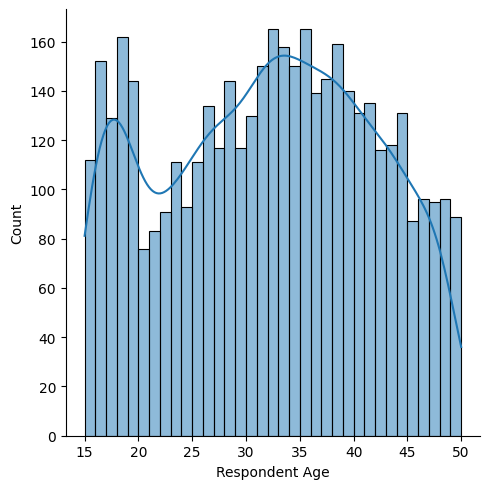

In [55]:
# Check the distribution of respondent ages
plt.figure(figsize=(3, 3))
sns.displot(df_fert_oh['AGER'], kde=True, bins=35)
plt.xlabel('Respondent Age')
#sns.countplot(df_fert_oh['INFHELP'])



C:\Users\david\AppData\Local\Temp\ipykernel_31068\4199932535.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Yes', 'No', 'Not ascertained', 'Refused', 'Uknown', 'Not applicable'], rotation=45, ha='right')


Text(0.5, 0, '')

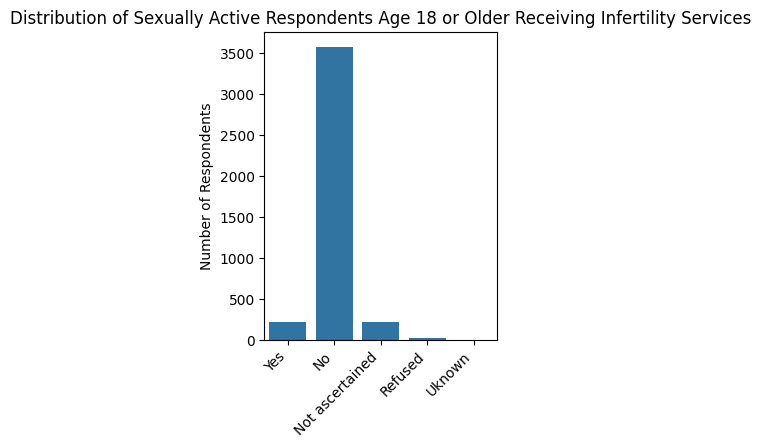

In [75]:
plt.figure(figsize=(3, 4))
ax = sns.countplot(data=df_fert_oh, x='INFHELP')
ax.set_xticklabels(['Yes', 'No', 'Not ascertained', 'Refused', 'Uknown', 'Not applicable'], rotation=45, ha='right')
plt.title('Distribution of Sexually Active Respondents Age 18 or Older Receiving Infertility Services')
plt.ylabel('Number of Respondents')
plt.xlabel(None)


make a df containing respondents that indicated 'yes'='1' OR 'no'=5 to INFHELP

In [99]:
df_infhelp = df_fert_oh.dropna(subset=['INFHELP'])
df_infhelp.shape

(4062, 54)

In [100]:
df_infhelp = df_fert_oh[df_fert_oh['INFHELP'].isin([1, 5])].copy()
df_infhelp['INFHELP'] = df_infhelp['INFHELP'].cat.rename_categories({1: 'Yes', 5: 'No'})
print(df_infhelp.shape)
#df_infhelp.head()

(3806, 54)


Text(0.5, 0, 'Overall Health Rating')

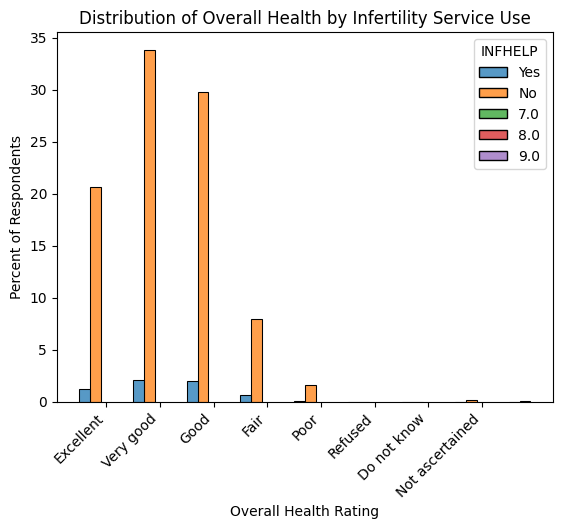

In [110]:
ax = sns.histplot(data=df_infhelp, x='GENHEALT', hue='INFHELP', stat='percent', multiple='dodge', discrete=True)
ax.set_xticks(ticks=np.arange(1, 9))
ax.set_xticklabels(['Excellent', 'Very good', 'Good', 'Fair', 'Poor', 'Refused', 'Do not know', 'Not ascertained'], rotation=45, ha='right')
plt.title('Distribution of Overall Health by Infertility Service Use')
plt.ylabel('Percent of Respondents')
plt.xlabel('Overall Health Rating')